<a href="https://colab.research.google.com/github/RakeshSharma21/Sessions_Notebook/blob/main/Model_Selection_17_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing

In [6]:
california = fetch_california_housing()

In [10]:
(california.target > california.target.mean()).astype(int)

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
X = california.data
y= (california.target > california.target.mean()).astype(int)

In [12]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [14]:
california. feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [15]:
import pandas as pd

In [16]:
X_df = pd. DataFrame(X, columns=california.feature_names)

In [17]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [21]:
X_df. describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


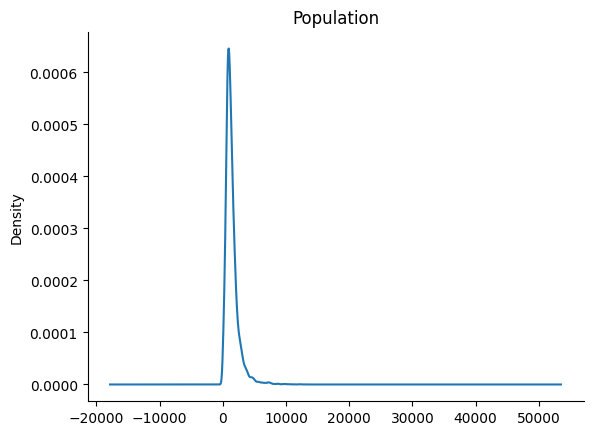

In [20]:
from matplotlib import pyplot as plt
X_df['Population'].plot(kind='kde', title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Exploration


1.   if mean > median then + ve or right side skew.
2.   if mean < median then -ve or left side skew.

1.   if max -75% > 25%-min then +ve or right side skew
2.   if max -75% < 25%-min then -ve or left side skew













In [22]:
X_df1 = X_df.copy()
X_df1['Target'] = y

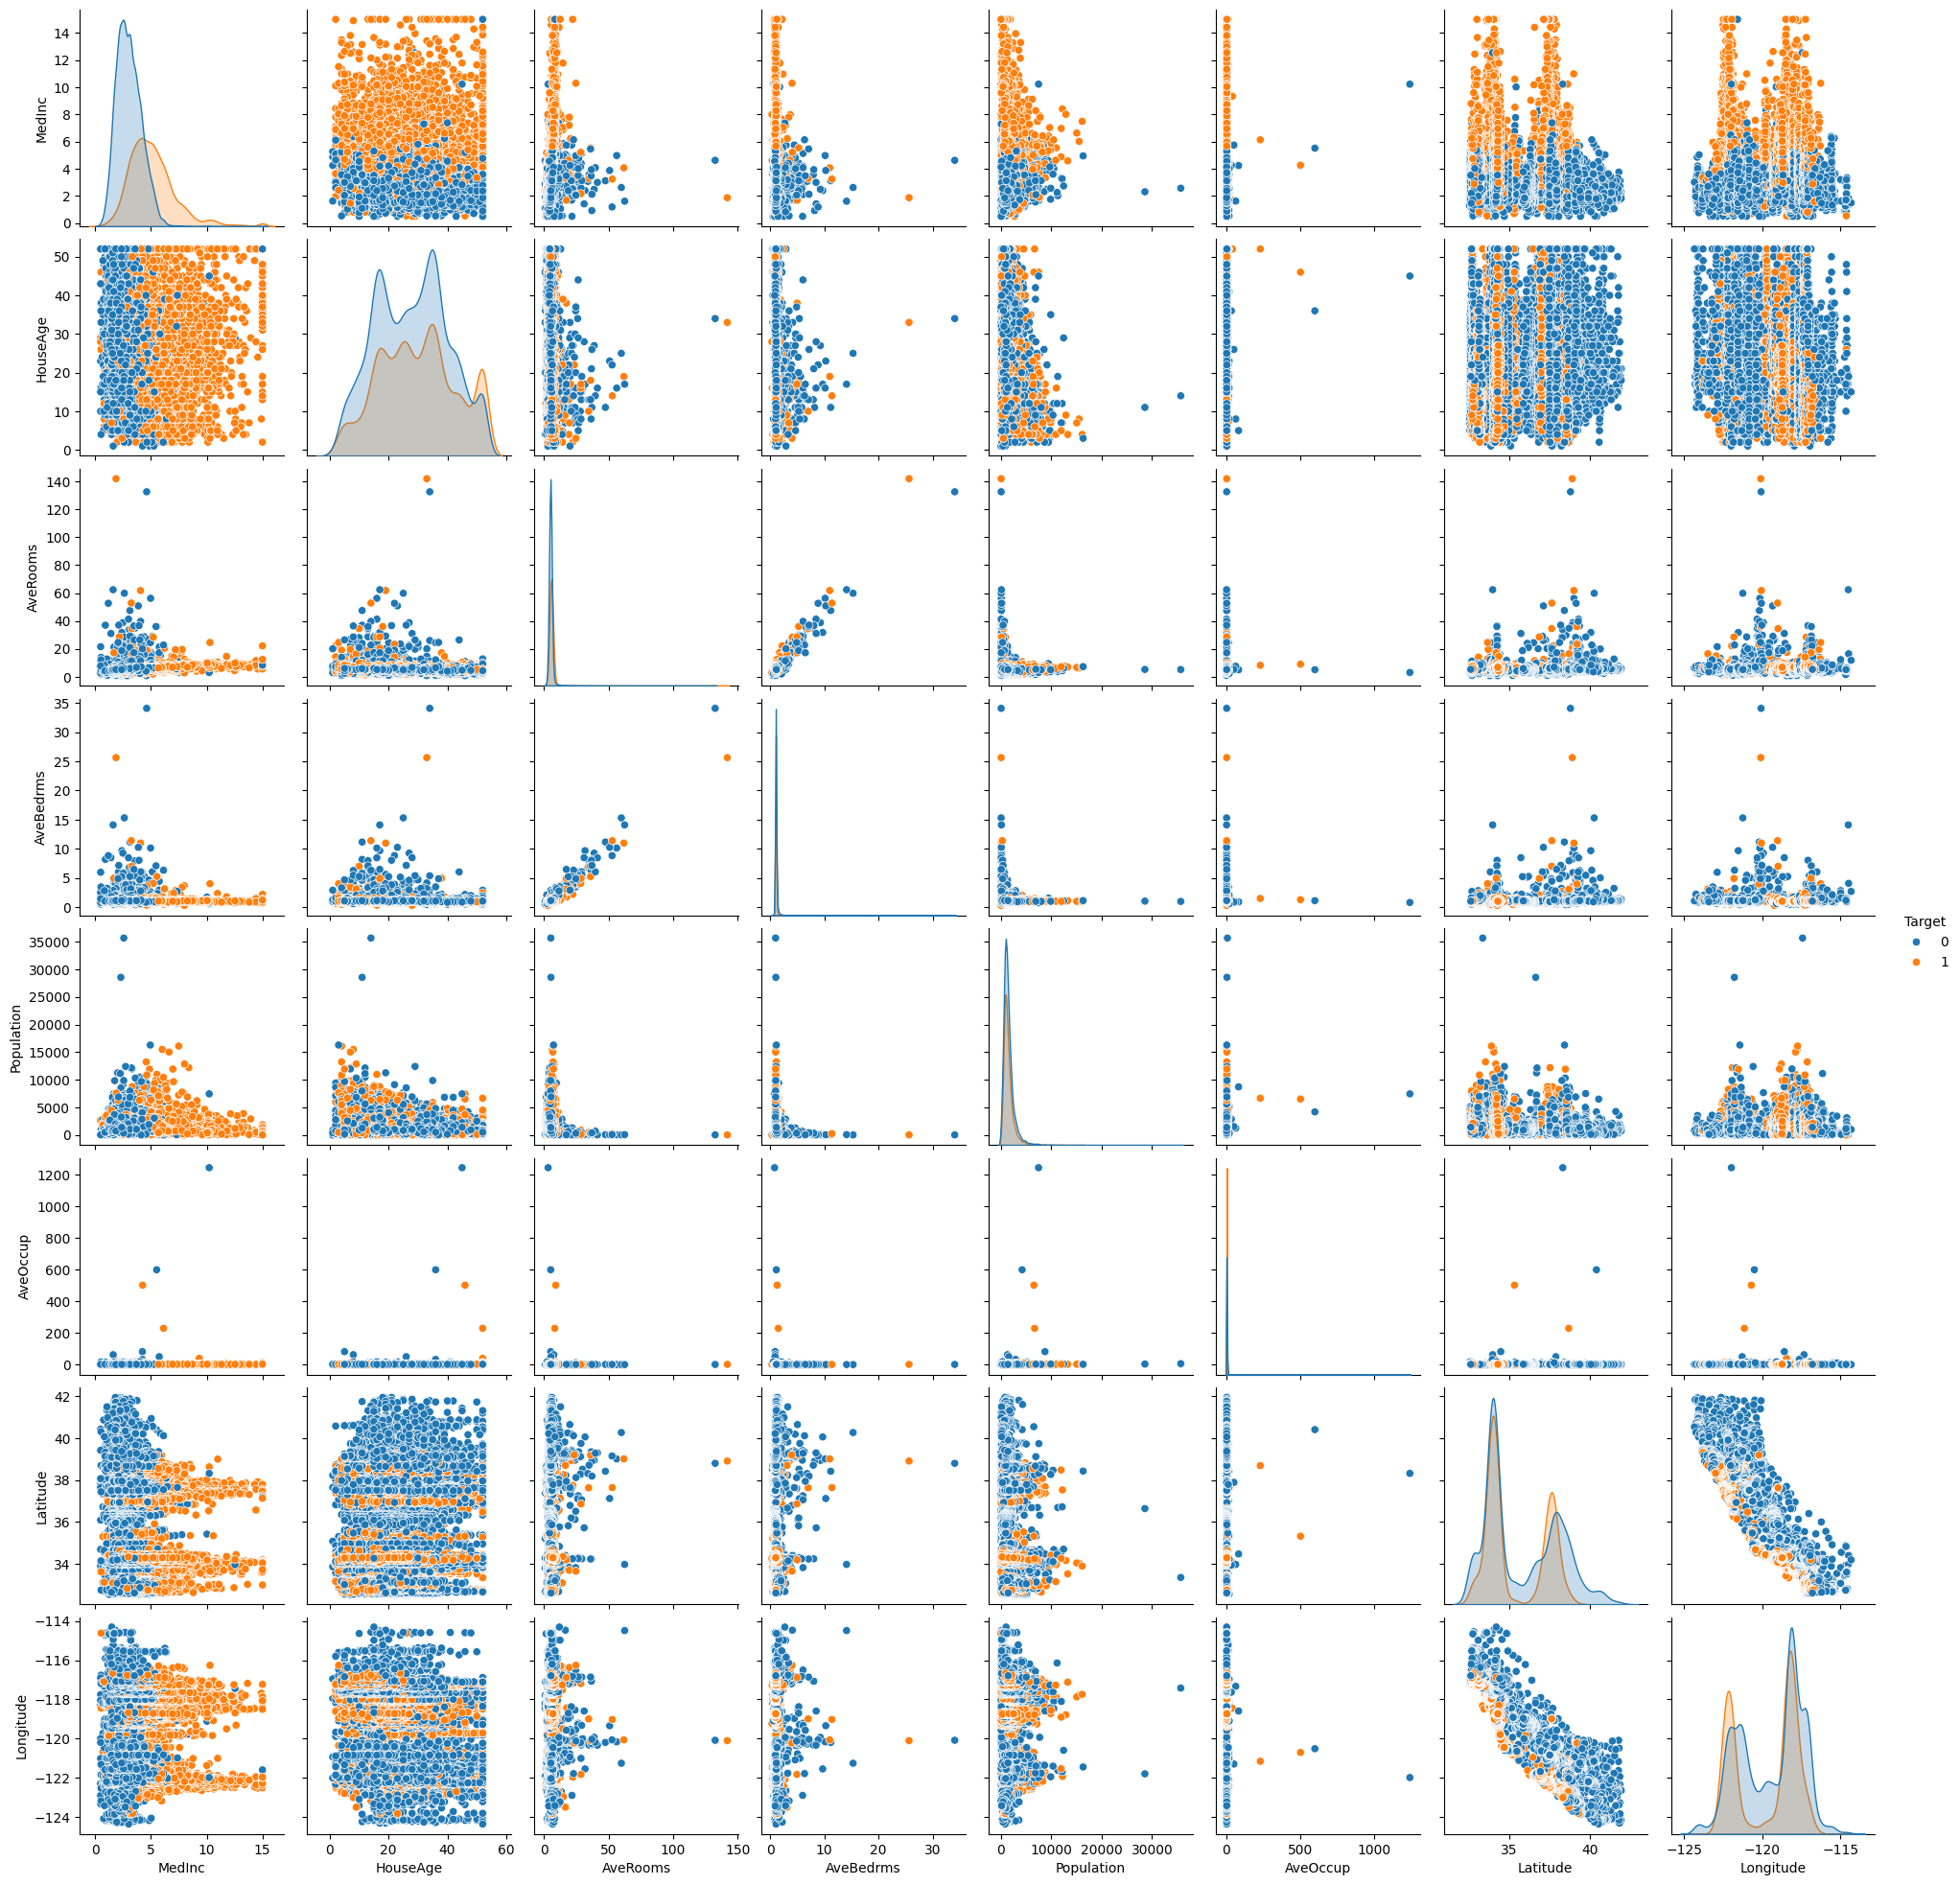

In [23]:
from seaborn import pairplot
pairplot(X_df1, hue='Target')

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
## zscore = (X-mu)/std
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

## splitting the dataset

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred_logreg = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred_logreg))
print(accuracy_score(y_test, y_pred_logreg))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2476
           1       0.81      0.77      0.79      1652

    accuracy                           0.84      4128
   macro avg       0.83      0.82      0.83      4128
weighted avg       0.83      0.84      0.83      4128

0.8352713178294574
[[2176  300]
 [ 380 1272]]


In [56]:
log_reg.score(X_test, y_test)

0.8352713178294574

### KNN classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2476
           1       0.80      0.77      0.78      1652

    accuracy                           0.83      4128
   macro avg       0.82      0.82      0.82      4128
weighted avg       0.83      0.83      0.83      4128

0.8306686046511628
[[2153  323]
 [ 376 1276]]


In [59]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(3, 10)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 10)})

In [60]:
grid_search.best_params_

{'n_neighbors': 9}

In [61]:
grid_search.best_score_

0.8378749161280432

In [62]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [63]:
y_pred=grid_search.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2476
           1       0.81      0.77      0.79      1652

    accuracy                           0.84      4128
   macro avg       0.83      0.82      0.83      4128
weighted avg       0.83      0.84      0.83      4128

0.8357558139534884
[[2186  290]
 [ 388 1264]]


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2476
           1       0.81      0.77      0.79      1652

    accuracy                           0.84      4128
   macro avg       0.83      0.82      0.83      4128
weighted avg       0.83      0.84      0.83      4128

0.8357558139534884
[[2186  290]
 [ 388 1264]]


### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred=dt.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2476
           1       0.80      0.79      0.79      1652

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128

0.8340600775193798
[[2143  333]
 [ 352 1300]]


In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(3, 15)}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 15)})

In [70]:
grid_search.best_params_

{'max_depth': 10}

In [71]:
grid_search.best_score_

0.8487159865863549

In [72]:
y_pred_dt=grid_search.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2476
           1       0.82      0.78      0.80      1652

    accuracy                           0.84      4128
   macro avg       0.84      0.83      0.84      4128
weighted avg       0.84      0.84      0.84      4128

0.8439922480620154
[[2191  285]
 [ 359 1293]]


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = ['Logistic Regression', 'KNN', 'Decision Tree']
y_preds = [y_pred_logreg, y_pred_knn, y_pred_dt]

for i, model in enumerate(models):
    print(f' Model name is -----{model}---------')
    # print("Classification_report",classification_report(y_test, y_preds[i]))
    print("Accuracy_score" ,accuracy_score(y_test, y_preds[i]))
    print("Precision_score",precision_score(y_test, y_preds[i]))
    print("Recall_score",recall_score(y_test, y_preds[i]))
    print("f1_score",f1_score(y_test, y_preds[i]))

 Model name is -----Logistic Regression---------
Accuracy_score 0.8352713178294574
Precision_score 0.8091603053435115
Recall_score 0.7699757869249395
f1_score 0.7890818858560795
 Model name is -----KNN---------
Accuracy_score 0.8357558139534884
Precision_score 0.8133848133848134
Recall_score 0.7651331719128329
f1_score 0.7885215221459763
 Model name is -----Decision Tree---------
Accuracy_score 0.8439922480620154
Precision_score 0.8193916349809885
Recall_score 0.7826876513317191
f1_score 0.8006191950464397
